<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [4]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [6]:
import torch.nn as nn

In [7]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_hidden = nn.Linear(2, 8)
        self.activation = nn.ReLU()
        self.hidden_output = nn.Linear(8, 1)
    
    def forward(self, x):
        x = self.input_hidden(x)
        x = self.activation(x)
        x = self.hidden_output(x)
        return x

In [8]:
torch.manual_seed(0)

In [30]:
mynet = MyNeuralNetwork().to(device)

In [31]:
mynet.input_hidden.weight

Parameter containing:
tensor([[-0.4607, -0.0363],
        [ 0.5062, -0.0727],
        [ 0.0197, -0.0610],
        [ 0.1431,  0.4496],
        [ 0.6698,  0.4491],
        [ 0.6713, -0.0511],
        [-0.6352, -0.3352],
        [ 0.4815, -0.0046]], device='cuda:0', requires_grad=True)

In [32]:
list(mynet.parameters())

[Parameter containing:
 tensor([[-0.4607, -0.0363],
         [ 0.5062, -0.0727],
         [ 0.0197, -0.0610],
         [ 0.1431,  0.4496],
         [ 0.6698,  0.4491],
         [ 0.6713, -0.0511],
         [-0.6352, -0.3352],
         [ 0.4815, -0.0046]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.3515, -0.5419, -0.6617, -0.5968, -0.1434,  0.3878,  0.3823, -0.6820],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[ 0.2205, -0.2767, -0.0747, -0.1434, -0.0681, -0.0694, -0.3173, -0.3053]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.0553], device='cuda:0', requires_grad=True)]

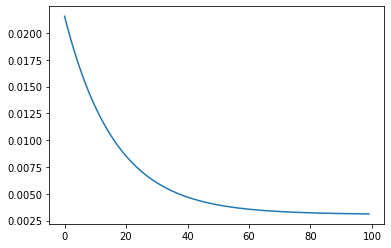

In [35]:
from torch.optim import SGD
import matplotlib.pyplot as plt

criterion = nn.MSELoss()
optimizer = SGD(mynet.parameters(), lr = 0.0001)

loss_hist = []
for i in range(100):
    optimizer.zero_grad()
    loss = criterion(mynet(X), Y)
    loss.backward()
    optimizer.step()
    loss_hist.append(loss.item())

plt.plot(loss_hist)

In [9]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [10]:
mynet = MyNeuralNet().to(device)

In [6]:
loss_func = nn.MSELoss()

In [11]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(45.8176, device='cuda:0', grad_fn=<MseLossBackward>)


In [12]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [13]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

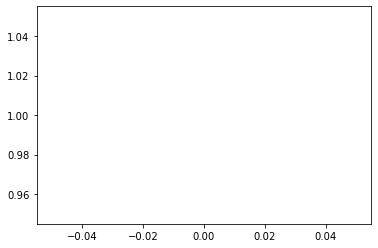

In [2]:
plt.plot([0, 0], [1, 1])